### Seurat3 integration of 10 donors' datasets

### COMBO10 (NO SPL3)

### Part 2

#### Exporting resulting integration to anndata
---
##### hpb29

Date: 2021-01-08

In [1]:
library(Seurat)

In [2]:
data.path = '~/datafloor/users/2020/SLX19841/analysis/matrices/'

---

In [4]:
data.anchors <- readRDS(file = paste0(data.path, 'COMBO10_NO_SPL3_Seurat3_anchors.rds'))

In [5]:
data.integrated <- readRDS(file = paste0(data.path, 'COMBO10_NO_SPL3_Seurat3_integrated.rds'))

In [6]:
suppressWarnings(library(ggplot2))
suppressWarnings(library(cowplot))

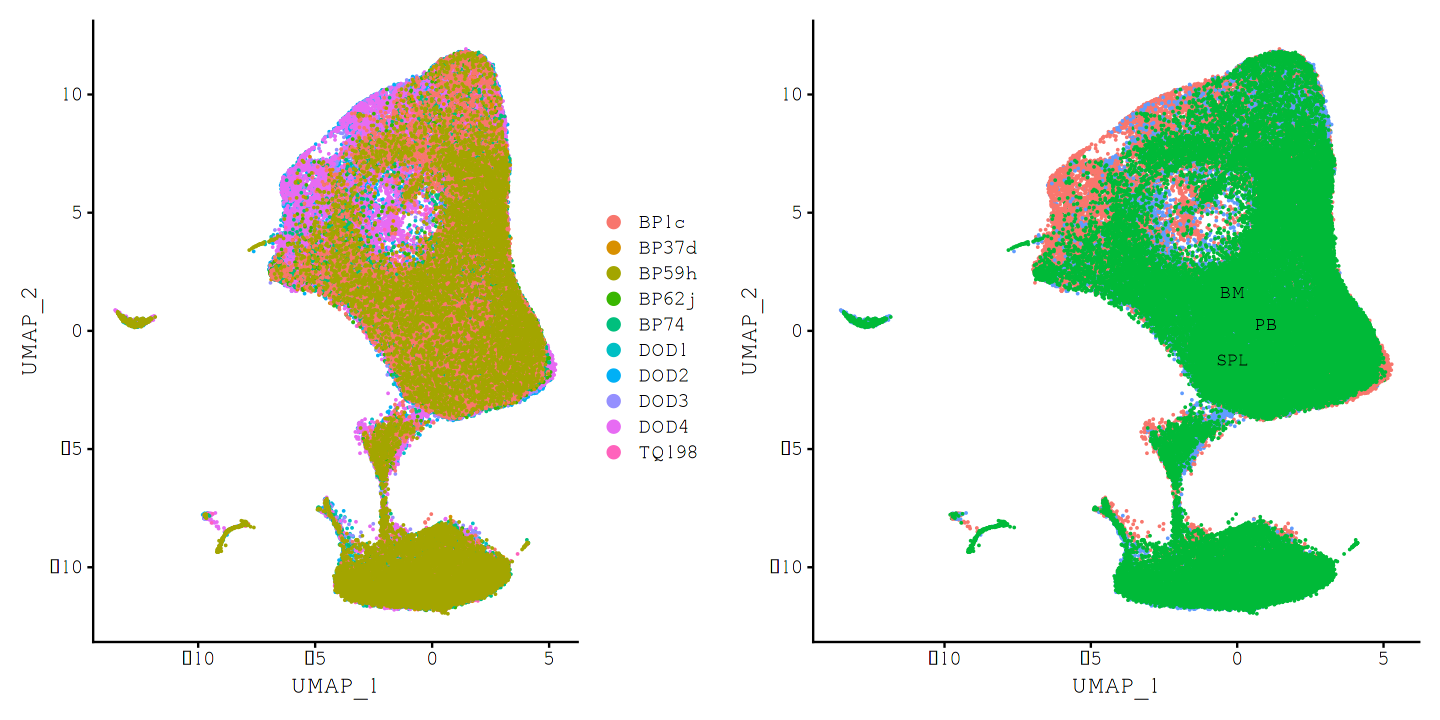

In [8]:
p1 <- DimPlot(object = data.integrated, reduction = "umap", group.by = "donor")
p2 <- DimPlot(object = data.integrated, reduction = "umap", group.by = "organ", 
    label = TRUE, repel = TRUE) + NoLegend()

options(repr.plot.width=12, repr.plot.height=6)
plot_grid(p1, p2)

In [9]:
data.list.i <- SplitObject(object = data.integrated, split.by = "donor")

In [10]:
d1 <- DimPlot(object = data.list.i[['DOD1']], reduction = "umap", group.by = "donor")
d2 <- DimPlot(object = data.list.i[['DOD2']], reduction = "umap", group.by = "donor")
d3 <- DimPlot(object = data.list.i[['DOD3']], reduction = "umap", group.by = "donor")
d4 <- DimPlot(object = data.list.i[['DOD4']], reduction = "umap", group.by = "donor")
d5 <- DimPlot(object = data.list.i[['TQ198']], reduction = "umap", group.by = "donor")
d6 <- DimPlot(object = data.list.i[['BP62j']], reduction = "umap", group.by = "donor")
d7 <- DimPlot(object = data.list.i[['BP37d']], reduction = "umap", group.by = "donor")
d8 <- DimPlot(object = data.list.i[['BP74']], reduction = "umap", group.by = "donor")
d9 <- DimPlot(object = data.list.i[['BP1c']], reduction = "umap", group.by = "donor")
d10 <- DimPlot(object = data.list.i[['BP59h']], reduction = "umap", group.by = "donor")

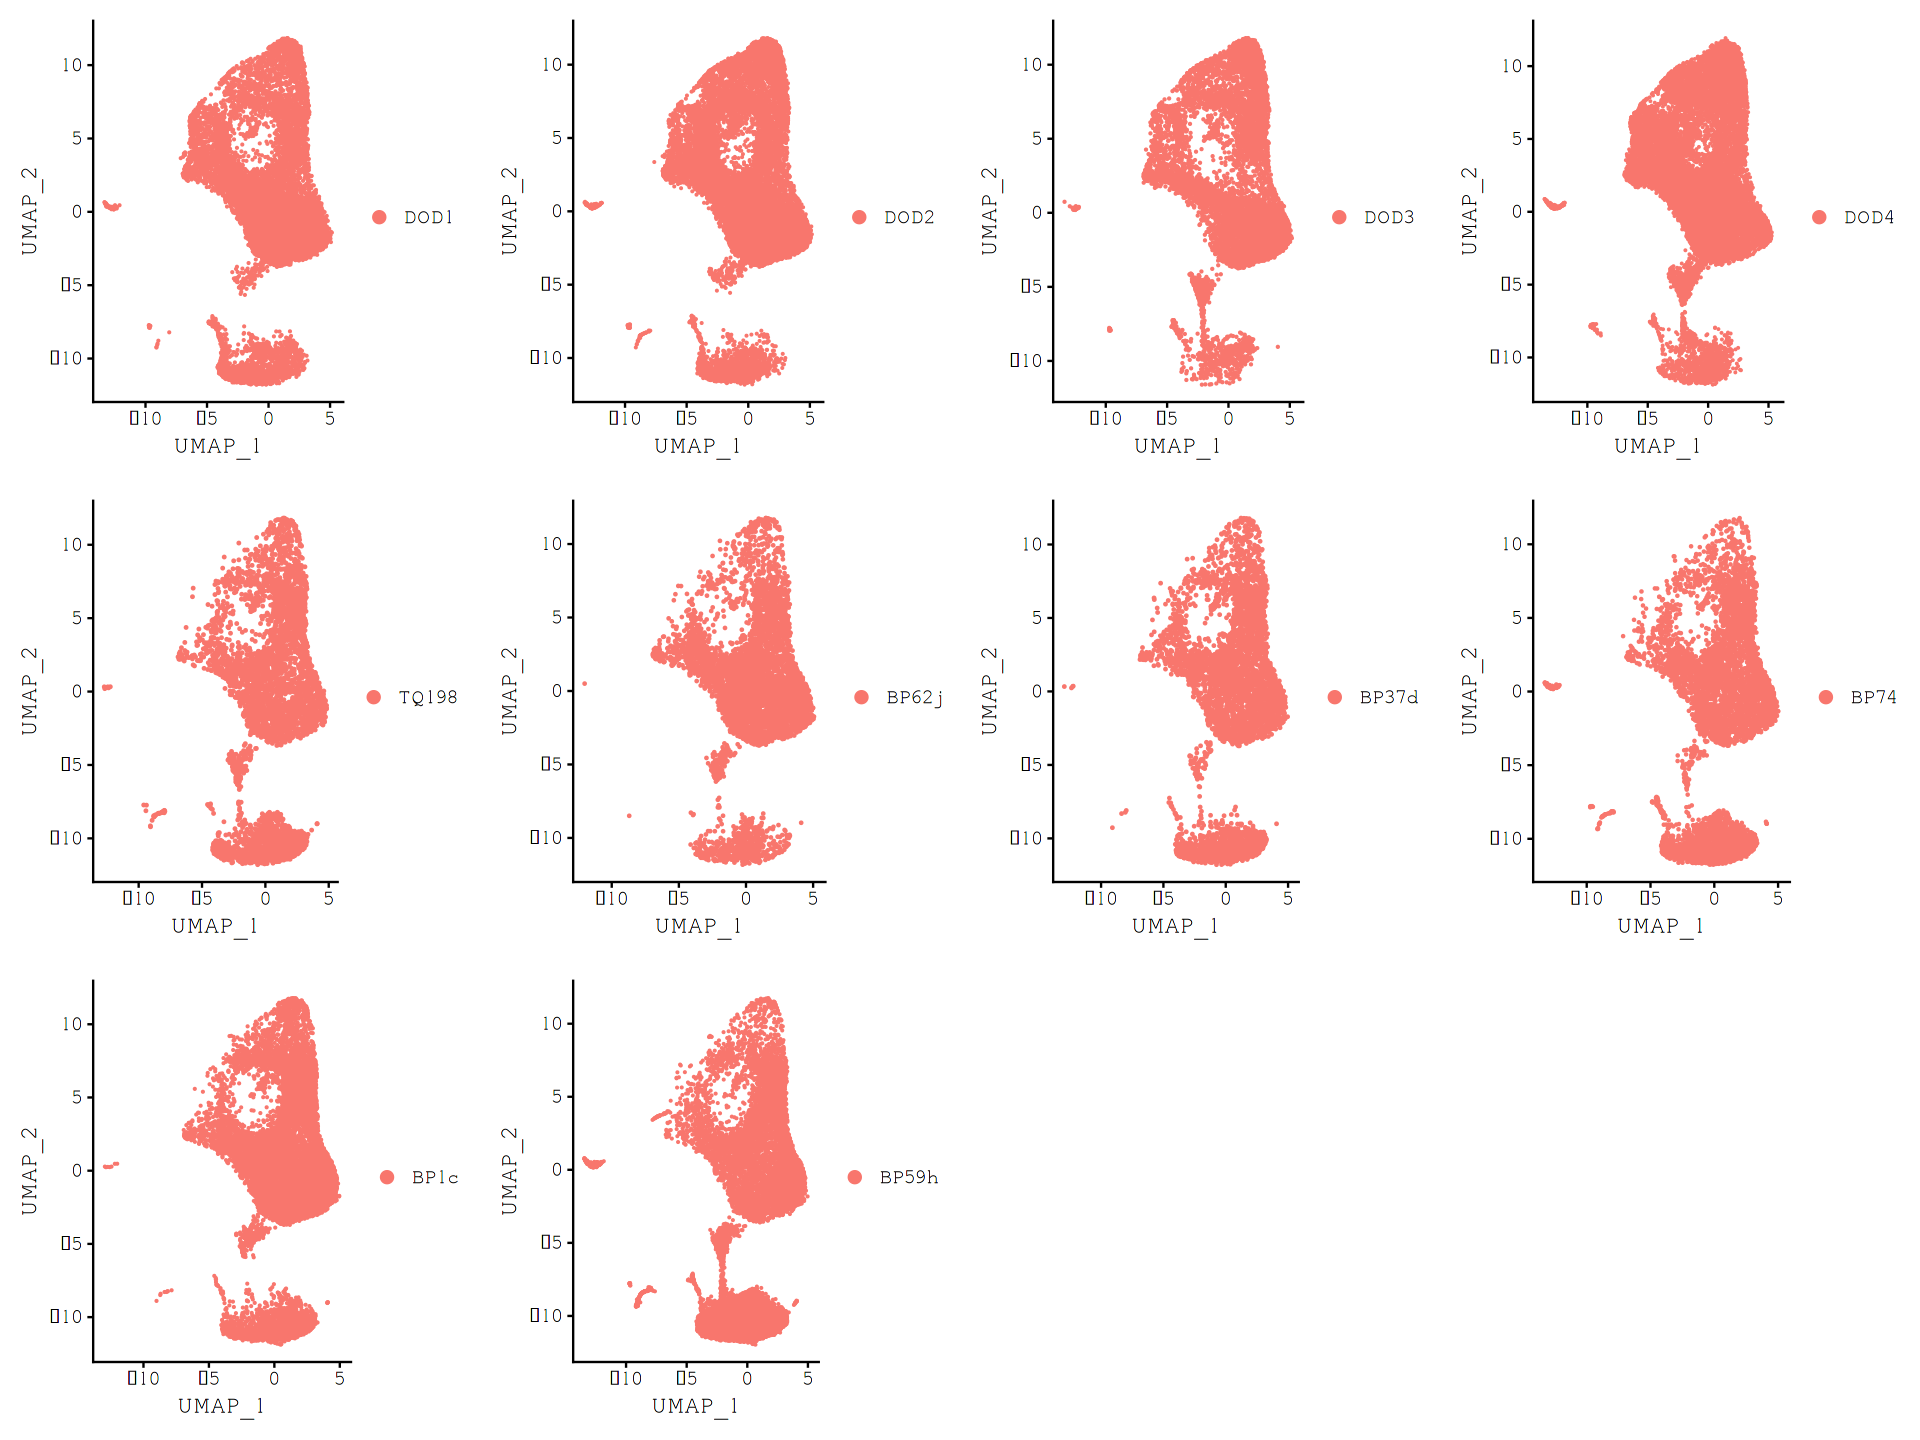

In [11]:
options(repr.plot.width=16, repr.plot.height=12)
plot_grid(d1, d2, d3, d4, d5, d6, d7, d8, d9, d10)

# ==========================================

In [12]:
print(data.integrated[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  DUSP6, CD74, KIAA0125, MALAT1, KLF6 
Negative:  KIAA0101, TYMS, H2AFZ, HNRNPAB, PCNA 
PC_ 2 
Positive:  RPS2, RPS18, RPL12, RPS8, RPS6 
Negative:  NKG7, RASD1, TYROBP, IGJ, TMSB4X 
PC_ 3 
Positive:  SLC38A1, LTB, SLC2A5, CCR7, IGJ 
Negative:  THBS1, VCAN, FCN1, LYZ, FPR1 
PC_ 4 
Positive:  C1QTNF4, AREG, CEACAM4, SELL, SPINK2 
Negative:  CNRIP1, KLF1, ANK1, APOC1, PRKAR2B 
PC_ 5 
Positive:  UBE2C, TOP2A, MKI67, BIRC5, ASPM 
Negative:  MPO, IGLL1, GYPC, RPL14, C1QTNF4 


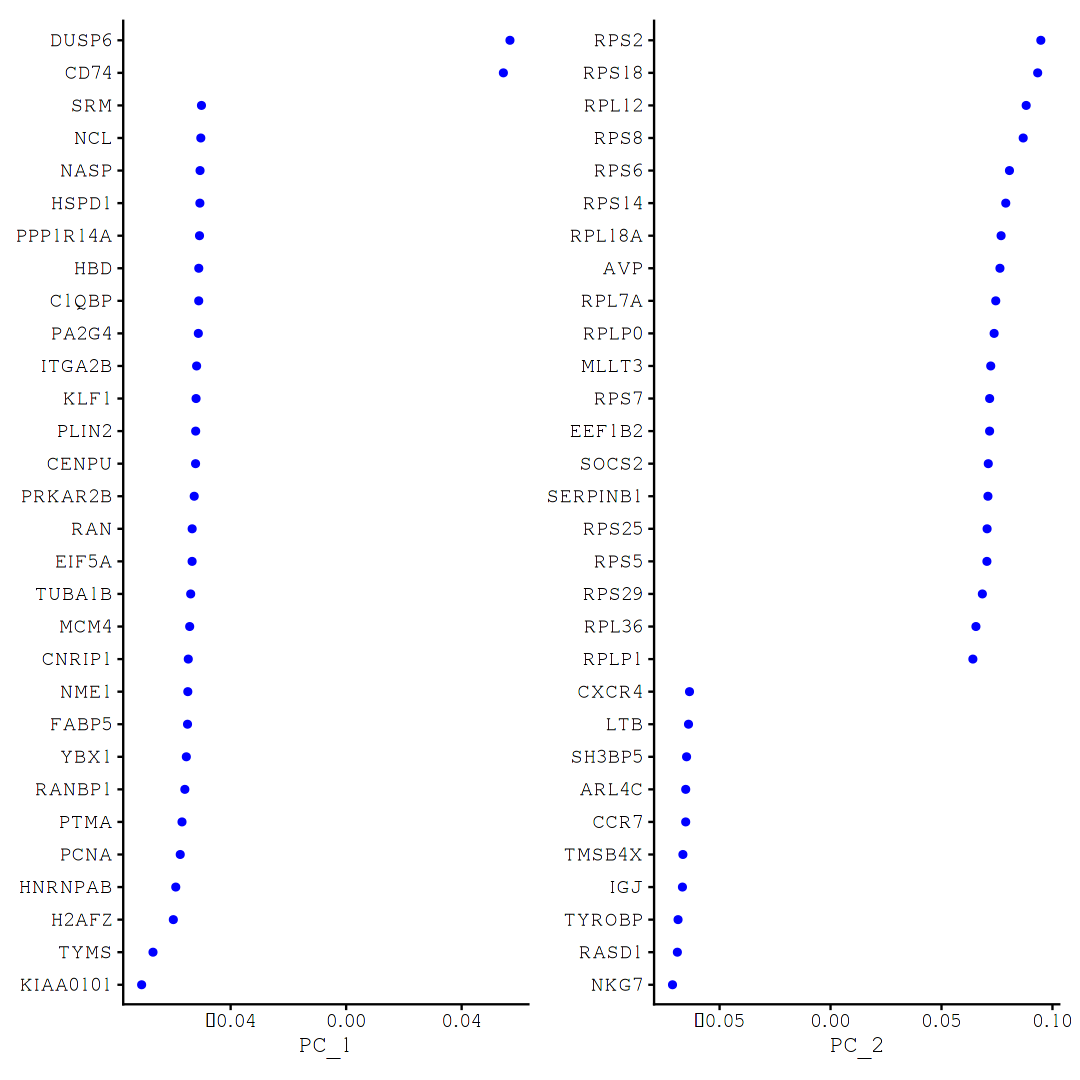

In [13]:
options(repr.plot.width=9, repr.plot.height=9)
VizDimLoadings(data.integrated, dims = 1:2, reduction = "pca")

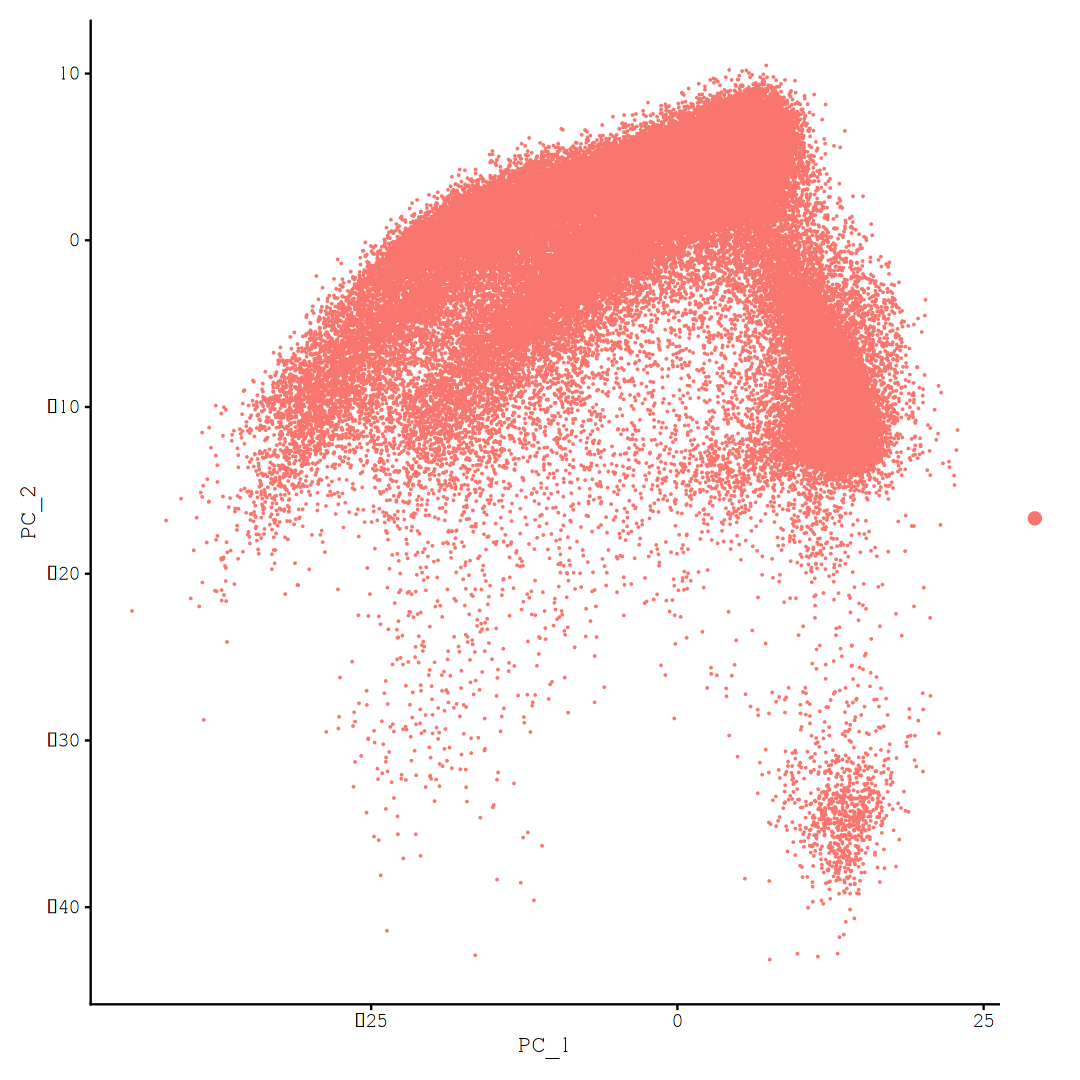

In [14]:
DimPlot(data.integrated, reduction = "pca")

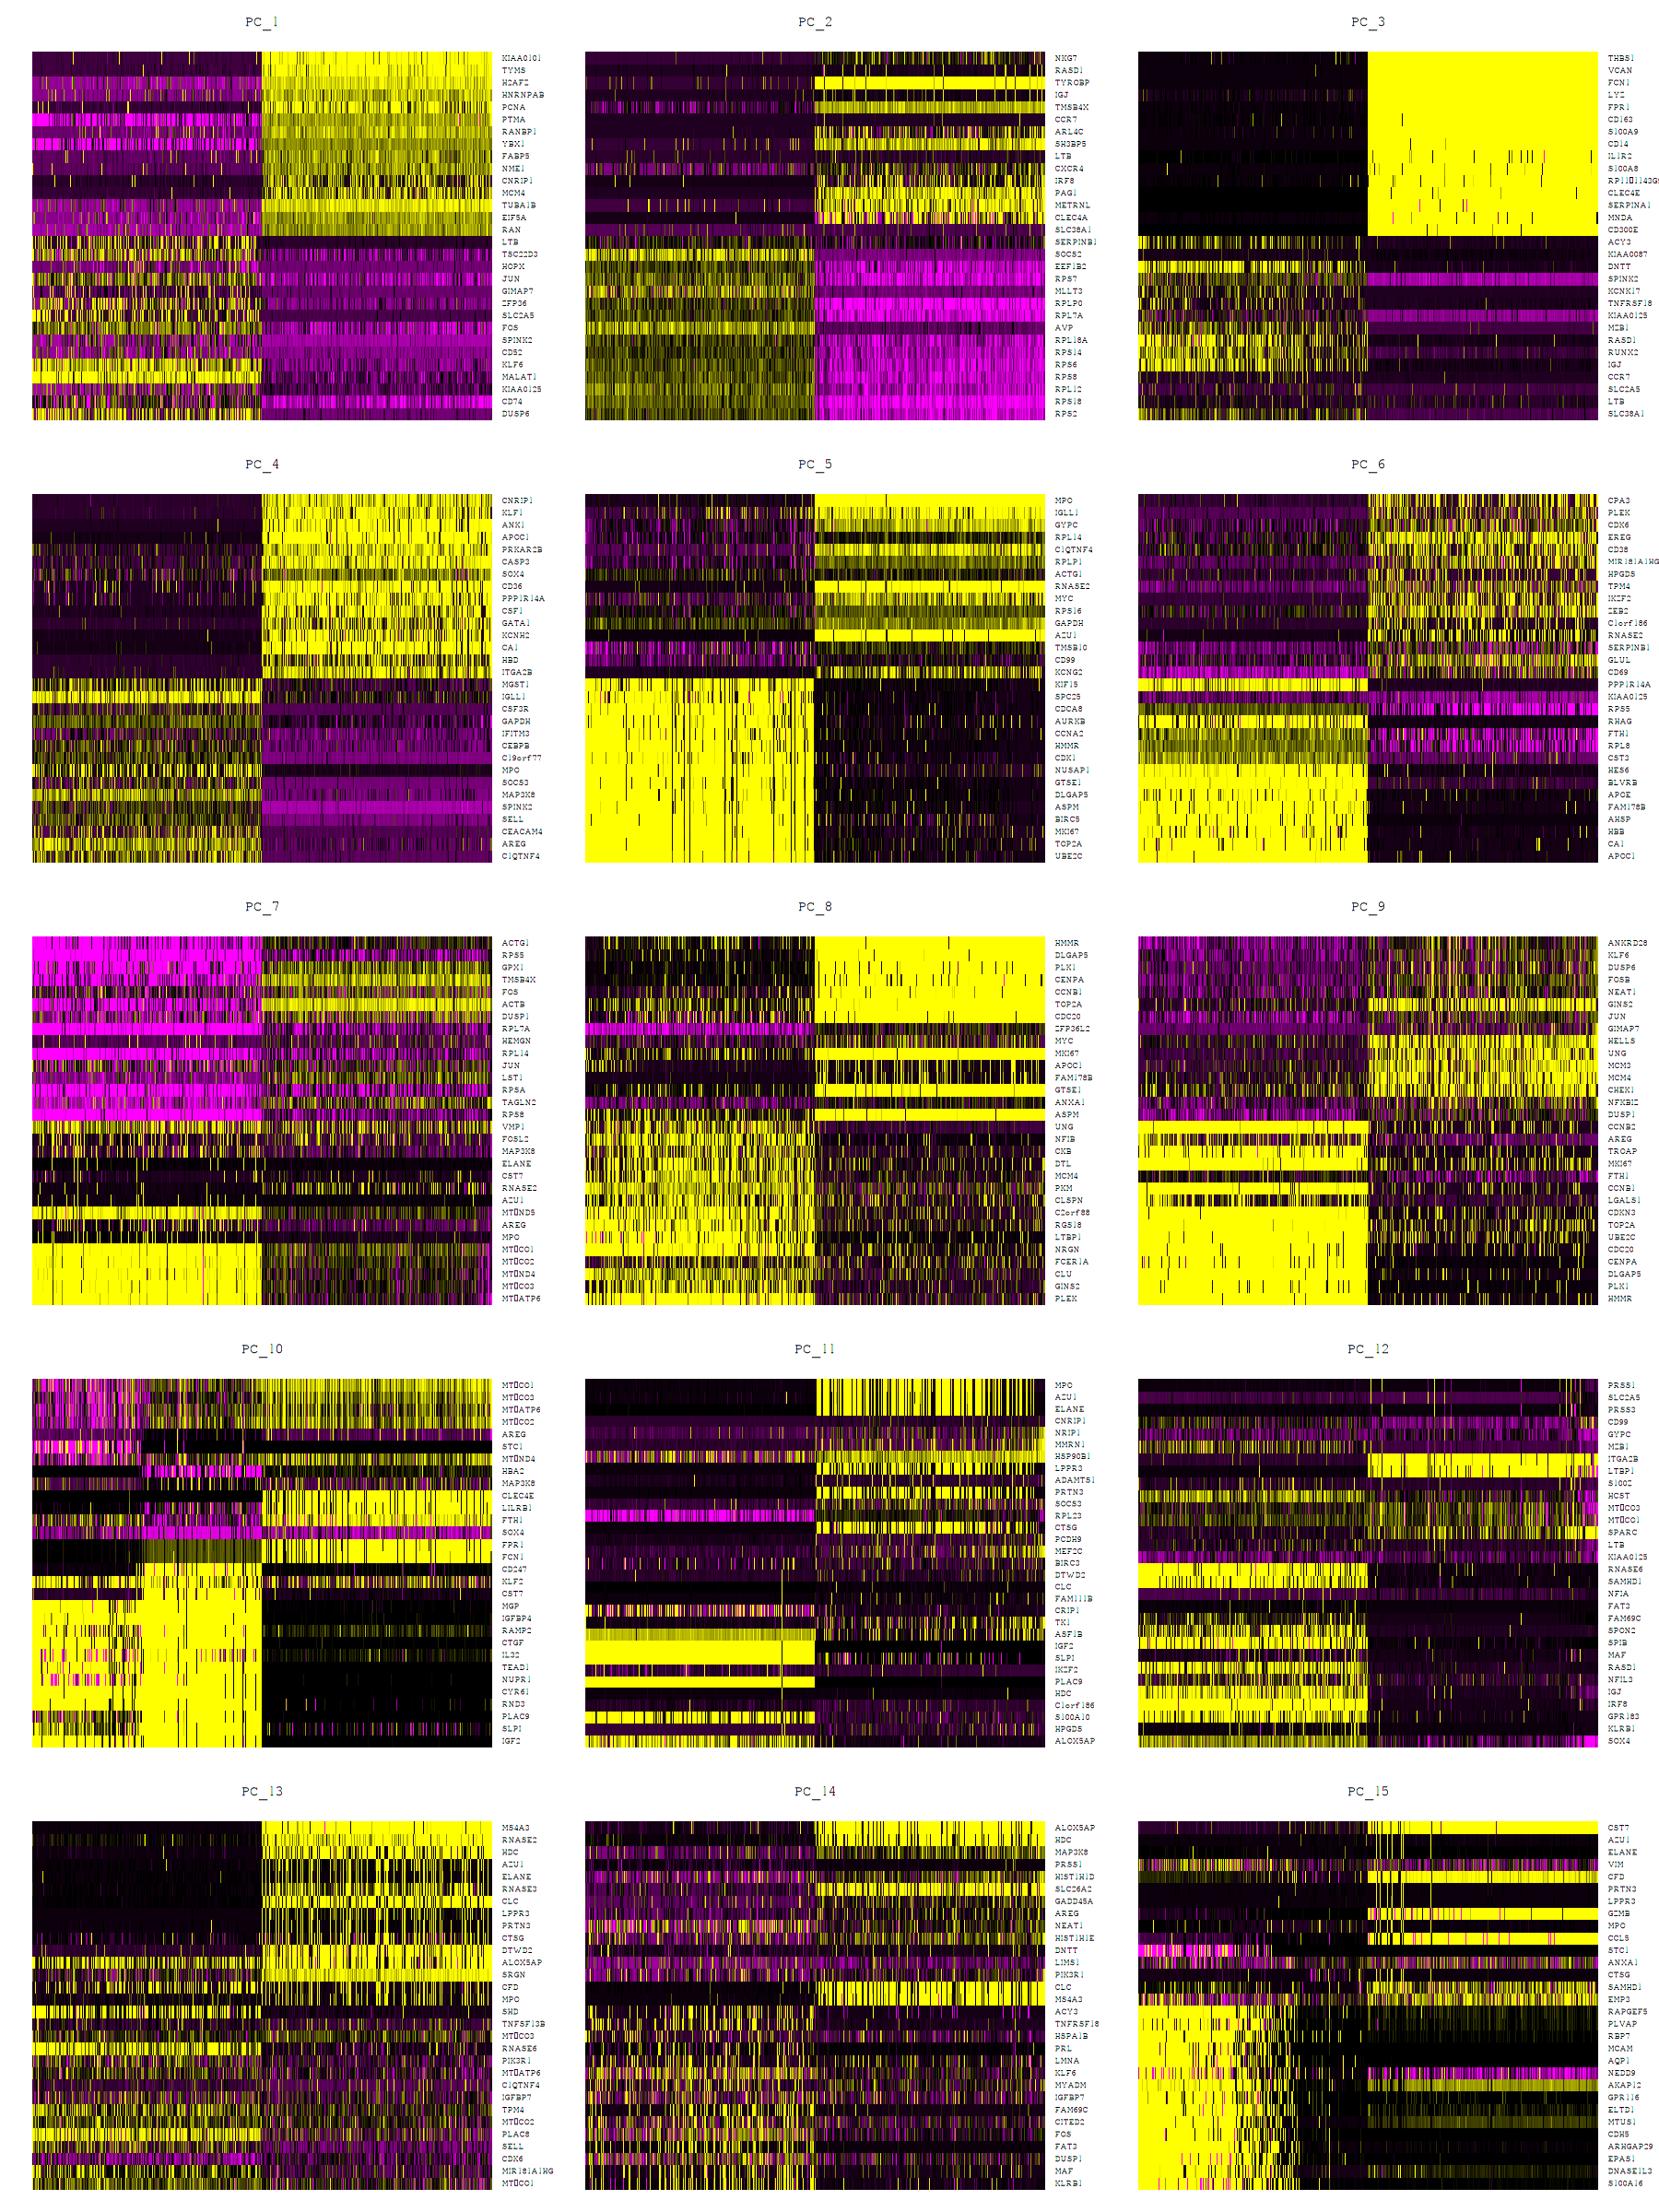

In [15]:
options(repr.plot.width=15, repr.plot.height=20)
DimHeatmap(data.integrated, dims = 1:15, cells = 500, balanced = TRUE)

Determining the ‘dimensionality’ of the dataset

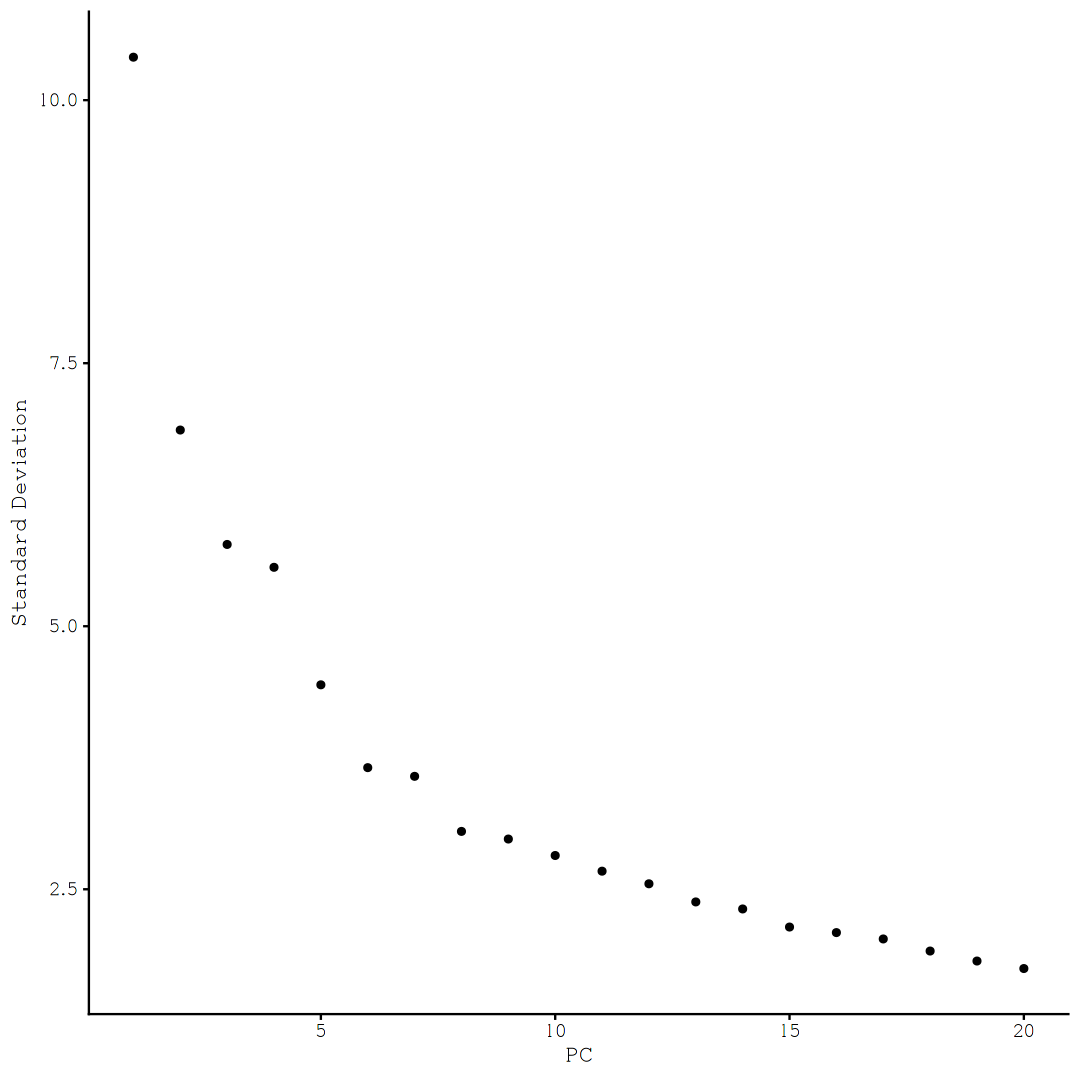

In [16]:
options(repr.plot.width=9, repr.plot.height=9)
ElbowPlot(data.integrated)

In [17]:
# Clustering
data.integrated <- FindNeighbors(data.integrated, dims = 1:8)
data.integrated <- FindClusters(data.integrated)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 118783
Number of edges: 3482320

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8810
Number of communities: 21
Elapsed time: 83 seconds


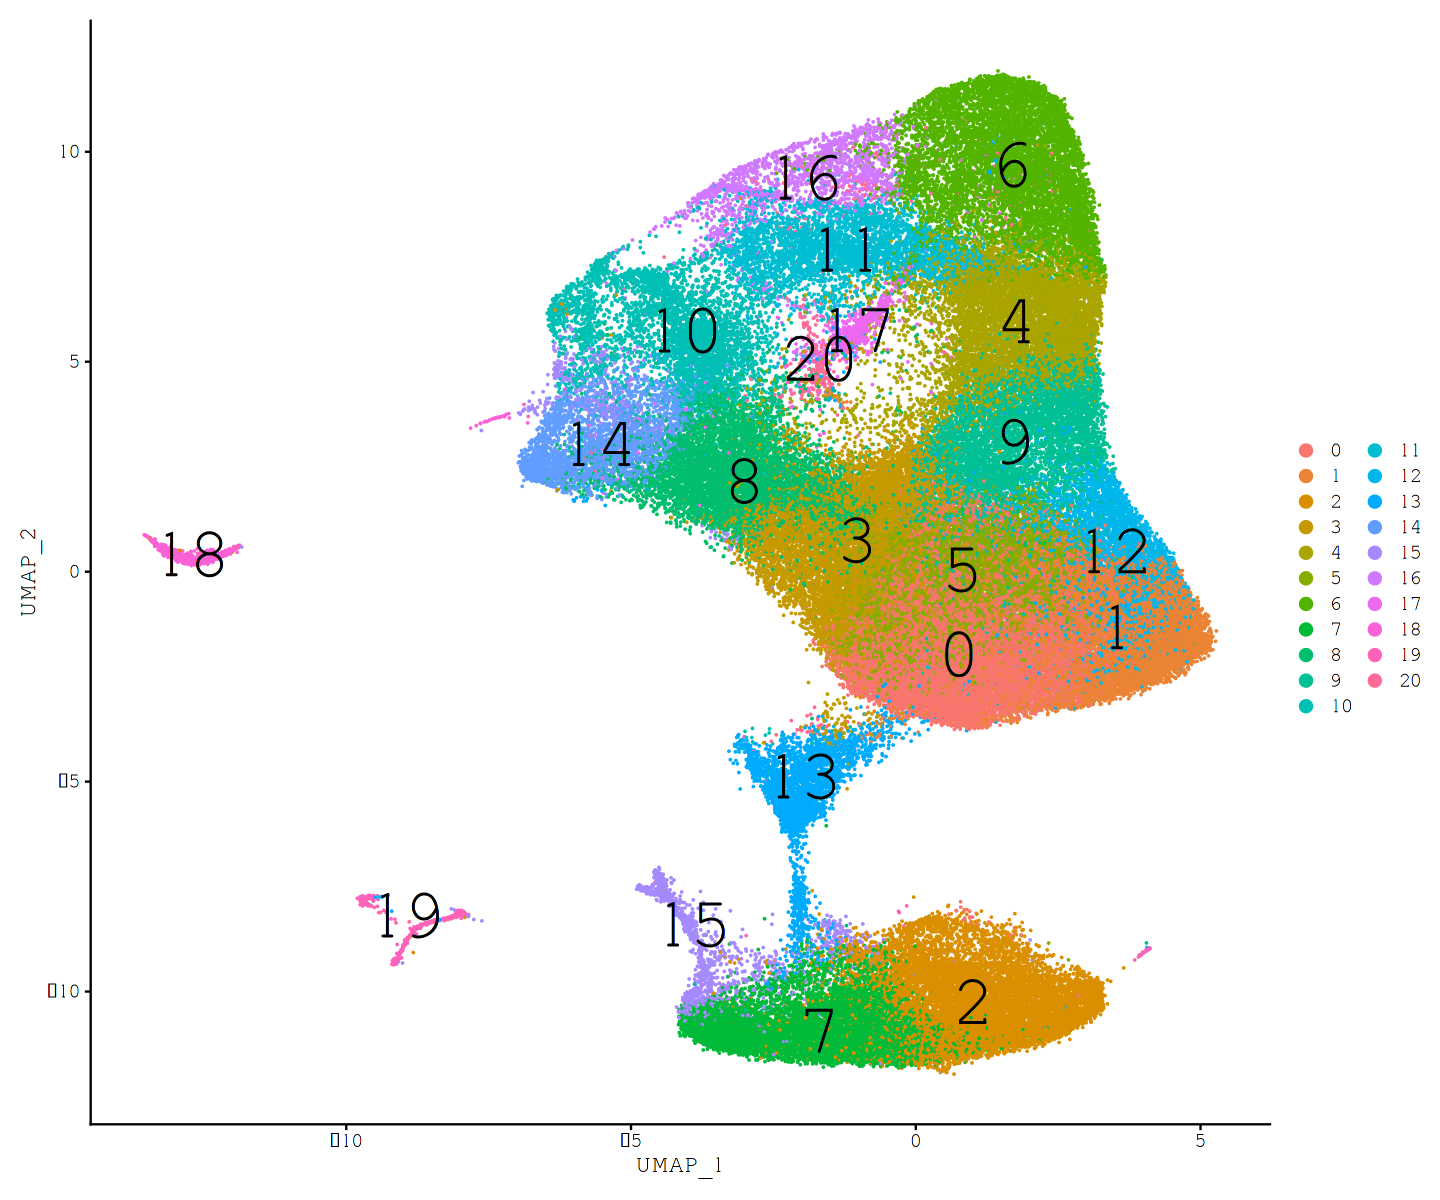

In [18]:
options(repr.plot.width=12, repr.plot.height=10)
DimPlot(data.integrated, reduction = "umap", label = TRUE, label.size = 15)

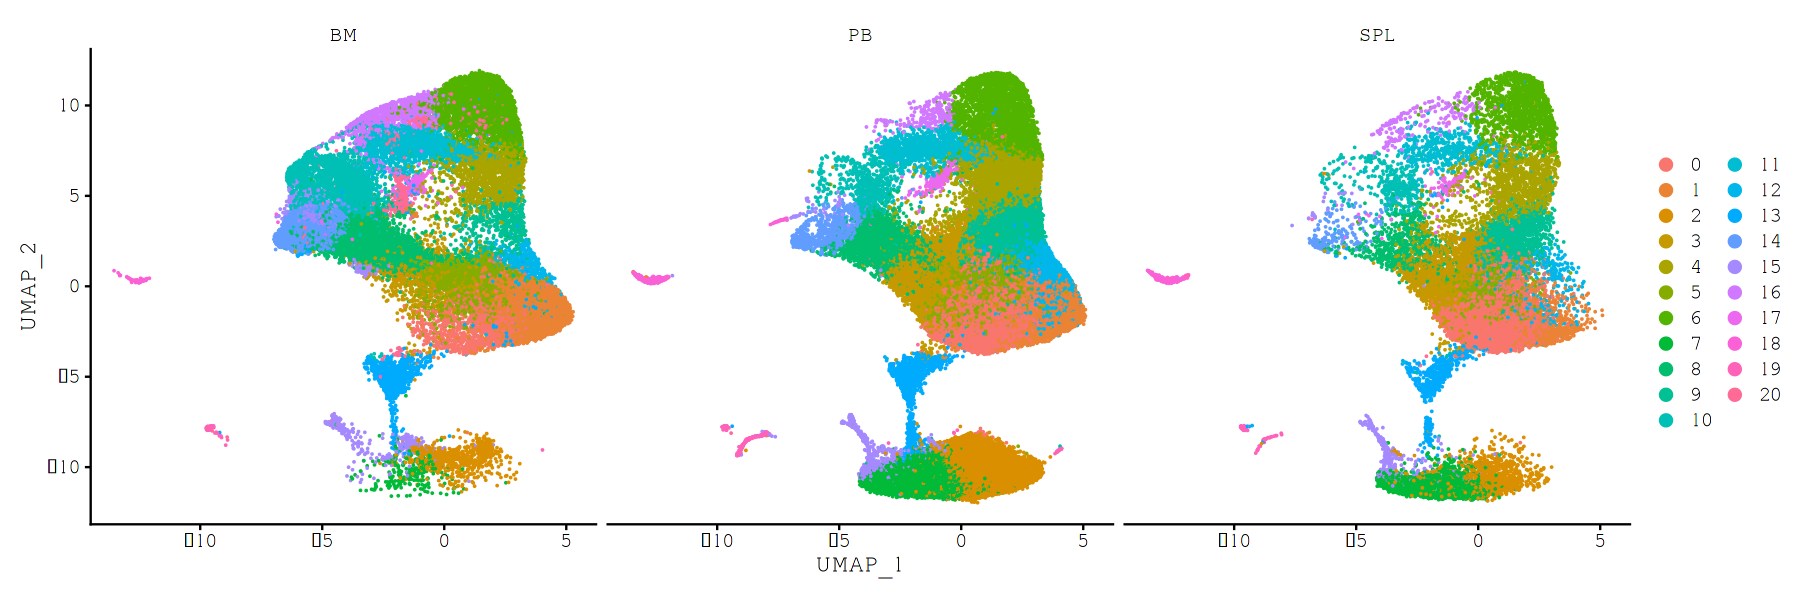

In [20]:
options(repr.plot.width=15, repr.plot.height=5)
DimPlot(data.integrated, reduction = "umap", split.by = "organ") #, cols = distinct_26_colors)

In [22]:
write.table(file = 'output/COMBO10_NO_SPL3_Seurat3_metadata.txt', sep='\t', 
            data.integrated@meta.data)

In [23]:
data.integrated

An object of class Seurat 
26322 features across 118783 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [24]:
# filling with dummy variable so that the conversion works
data.integrated@meta.data$orig.ident <- 'WTV'

In [25]:
Sys.time()
saveRDS(file = paste0(data.path, 'COMBO10_NO_SPL3_Seurat3_integrated_processed.rds'), data.integrated)
Sys.time()

[1] "2021-01-08 16:53:45 GMT"

[1] "2021-01-08 17:00:57 GMT"

In [26]:
library(SeuratDisk)

Registered S3 method overwritten by 'cli':
  method     from    
  print.boxx spatstat

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [27]:
transfile = paste0(data.path, "../h5ad/", "COMBO10_NO_SPL3_Seurat3_data_integrated.h5Seurat")

Two-step conversion to h5ad file

In [28]:
Sys.time()

SaveH5Seurat(data.integrated, filename = transfile)
Convert(transfile, dest = "h5ad")

Sys.time()

[1] "2021-01-08 17:02:01 GMT"

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding data for integrated

Adding scale.data for integrated

Adding variable features for integrated

No feature-level metadata found for integrated

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap

Validating h5Seurat file

Adding scale.data from integrated as X

Adding data from integrated as raw

Transfering meta.data to obs

Adding dimensional reduction information for pca

Adding feature loadings for pca

Adding dimensional reduction information for umap

Adding integrated_snn as neighbors



[1] "2021-01-08 17:08:05 GMT"